## TVB-Framework command initialisation

In [2]:
import os
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_multiscale.tvb_nest.config import *

work_path = os.getcwd()
data_path = work_path
tvb_conn_filepath = os.path.join(data_path, "Connectivity_res100_596_regions.h5")
outputs_path = os.path.join(work_path, "outputs/cereb")
config = Config(output_base=outputs_path)

config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'
config.figures.DEFAULT_SIZE= config.figures.NOTEBOOK_SIZE
FIGSIZE = config.figures.DEFAULT_SIZE

from tvb_multiscale.core.plot.plotter import Plotter
plotter = Plotter(config.figures)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

2021-10-06 18:04:00,321 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2021-10-06 18:04:00,321 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2021-10-06 18:04:00,326 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2021-10-06 18:04:00,326 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2021-10-06 18:04:00,330 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2021-10-06 18:04:00,330 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2021-10-06 18:04:00,333 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2021-10-06 18:04:00,333 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2021-10-06 18:04:00,336 - INFO - tvb_multiscale.tv

# This loads the just-prepared data:

In [3]:
import h5py
from tvb.datatypes.connectivity import Connectivity

f = h5py.File(tvb_conn_filepath)
result_connectivity = Connectivity(weights=np.array(f["weights"][()]), tract_lengths=np.array(f["tract_lengths"][()]), 
                               centres=np.array(f["centres"][()]), # hemispheres=np.array(f["hemispheres"][()]), 
                               region_labels=np.array(f["region_labels"][()]).astype("<U128"))
f.close()
result_connectivity.configure()
print(result_connectivity.weights)
print(result_connectivity.region_labels)
print(result_connectivity.number_of_regions)
print(result_connectivity.weights.shape)
print(result_connectivity.tract_lengths.shape)


[[3.02775796e-01 3.32728901e-02 9.89313689e-02 ... 1.36803986e-06
  1.95515882e-07 2.71852623e-05]
 [3.63441680e-02 9.30192841e-02 6.43270451e-02 ... 6.32084139e-05
  5.04100941e-05 4.45484959e-04]
 [8.47970561e-02 5.49682272e-02 7.45274259e-02 ... 2.99611362e-05
  4.17897432e-05 2.03744779e-04]
 ...
 [8.07329172e-07 2.73112949e-05 3.36029153e-05 ... 1.21380092e-01
  5.17439950e-02 3.86534058e-02]
 [8.07329172e-07 2.85348052e-05 3.54584335e-05 ... 1.00408312e-01
  7.84903743e-02 3.67525396e-02]
 [1.02162597e-04 2.77993498e-05 9.15227954e-06 ... 1.37087573e-02
  2.65998675e-03 2.71759043e-01]]
['Right Frontal pole, cerebral cortex' 'Right Primary motor area'
 'Right Secondary motor area' 'Right Primary somatosensory area, nose'
 'Right Primary somatosensory area, barrel field'
 'Right Primary somatosensory area, lower limb'
 'Right Primary somatosensory area, mouth'
 'Right Primary somatosensory area, upper limb'
 'Right Primary somatosensory area, trunk'
 'Right Primary somatosensory a

## Summarize the major structures, except for the cerebellum

In [4]:
# #pip install xlrd
# import sys
# !{sys.executable} -m pip install xlrd

In [5]:
# Open the xls file and create a mapping between all regions and the major structures they belong each.

import xlrd
sheet_data = []   
wb = xlrd.open_workbook(os.path.join(data_path, 'oh_table1.xls'))
p = wb.sheet_names()
#p[1]
#for y in p:
sh = wb.sheet_by_name(p[1])
print(sh)
for rownum in range(sh.nrows):
    sheet_data.append((sh.row_values(rownum)))

found_list = []
rows_to_be_saved = []
regions_missing = []
cc=0

for j in result_connectivity.region_labels: #go over the region labels
    j=j.split(" ",1)[1]
    #let us get rid of the left or right
    a=len(found_list)
    for i in sheet_data:
        if i[3] == j: #or i[2] == "string2" or i[2] == "string3" or i[2] == "string4" or i[2] == "string5":
            found_list.append(i[4])
        else:
            rows_to_be_saved.append(i)
    
    b=len(found_list)
    if a == b:
        regions_missing.append(j)
        found_list.append('X')
        print(a,b)
    
    b=len(found_list)
    cc+=1
    if b != cc:
        print(b,cc)
print("Regions missing:\n%s" % str(regions_missing))
print("Number of regions: %d" % len(found_list))

found_list = np.array(found_list)
major_structures = np.unique(found_list)
print(major_structures)


Sheet  1:<Voxel Count_295 Structures>
Regions missing:
[]
Number of regions: 596
['Cerebellar Cortex' 'Cerebellar Nuclei' 'Cortical Subplate'
 'Hippocampal Formation' 'Hypothalamus' 'Isocortex' 'Medulla' 'Midbrain'
 'Olfactory Areas' 'Pallidum' 'Pons' 'Striatum' 'Thalamus']


In [21]:
from copy import deepcopy


def repeat(arr, sub, axis=0, **kwargs):
    """This function will tile a subarray
       to create an array of shape similar to the input array's arr, 
       except for the axis given in the input, where size will be 1.
       It is used to substitute many labels by a single one."""
    shape = list(arr.shape)
    shape[axis] = 1
    return np.tile(sub, tuple(shape))
    

def delete(arr, axis=0, **kwargs):
    """This function returns an empty array 
       of shape similar to the input array's arr, 
       except for the axis given in the input, where size will be 0.
       It is used to delete a subarray."""
    shape = list(arr.shape)
    shape[axis] = 0
    return np.empty(tuple(shape))


def merge_axis(inds, arr, axis=0, fun=np.sum):
    """This function will merge a subarray of the input array arr,
       as defined by the input indices inds, along the input axis,
       applying the function fun, in order to summarize the values."""
    new_arr = np.delete(arr, inds, axis)
    array_to_be_merged = np.take(arr, inds, axis)
    merged_arr = fun(array_to_be_merged, axis, keepdims=True)
    return np.insert(new_arr, [np.minimum(inds[0], new_arr.shape[axis])], merged_arr, axis=axis)
    # return np.concatenate((new_arr, merged_arr), axis=axis)
    
    
def merge_nD(inds, arr, fun=np.sum):
    """This function will merge a subarray of the input array arr,
       as defined by the input indices inds, 
       along all the axes of arr (assuming same dimensionality along all axes),
       applying the function fun, in order to summarize the values."""
    new_arr = arr.copy()
    for ax in range(arr.ndim):
        new_arr = merge_axis(inds, new_arr, axis=ax, fun=fun)
    return new_arr


def merge_conn(conn, regions, new_label, weight_fun=np.sum, configure=False):
    """This function will merge an input TVB connectivity conn, 
       for the input regions (indices or labels), 
       substituting them with a summarized region of label new_label, 
       applying the summary function for the connectivity weights weight_fun.
       If configure is True, the new connectivity will also be configured."""
    if np.issubdtype(regions.dtype, np.integer):
        inds = regions
    else:
        inds = []
        for iR, region in conn.region_labels:
            if region in regions:
                inds.append(iR)
    new_conn = deepcopy(conn)
    repeat_fun = lambda arr, axis=0, **kwargs: repeat(arr, new_label, axis, **kwargs)
    new_conn.region_labels = merge_axis(inds, conn.region_labels, axis=0, fun=repeat_fun)
    new_conn.centres = merge_axis(inds, conn.centres, axis=0, fun=np.mean)
    new_conn.weights = merge_nD(inds, conn.weights, fun=weight_fun)
    new_conn.tract_lengths = merge_nD(inds, conn.tract_lengths, fun=np.mean)
    if configure:
        new_conn.configure()
    return new_conn

    
def merge_major_structure(conn, major_struct_to_merge, major_structs_labels, 
                          exclude_regions=[], bilateral_merge=False, weight_fun=np.sum, configure=False):
    """This function will merge an input TVB connectivity conn, 
       for the input major structure label major_struct_to_merge,
       assuming an input vector major_structs_labels, mapping all regions to a major structure,
       substituting merged regions with a summarized region of the major structure label, 
       and applying the summary function for the connectivity weights weight_fun.
       If configure is True, the new connectivity will also be configured."""
    if str(bilateral_merge)[0].upper() == "L" or str(bilateral_merge).upper() == "R":
        # If we want to merge only the Left or only the Right hemisphere
        if bilateral_merge[0].upper() == "L":
            look_for = "left"
            new_label = "Left "
        else:
            look_for = "right"
            new_label = "Right "
        regions_inds = np.where([major_structs_label == major_struct_to_merge and 
                                 region not in exclude_regions and
                                 look_for in region.lower()
                                 for region, major_structs_label in zip(conn.region_labels, major_structs_labels)])[0]
        new_label += major_struct_to_merge
        print("...regions' indices of %s:\n%s" % (new_label, str(regions_inds)))
        repeat_fun = lambda arr, axis=0, **kwargs: repeat(arr, major_struct_to_merge, axis, **kwargs)
        return merge_conn(conn, regions_inds, new_label, weight_fun=weight_fun, configure=configure), \
               merge_axis(regions_inds, major_structs_labels, axis=0, fun=repeat_fun) 
    elif bilateral_merge:
        # If bilateral is True, call twice recursively for Left and Right hemisphere:
        new_conn = deepcopy(conn)
        new_major_structs_labels = major_structs_labels.copy()
        for hemi in ["L", "R"]:
            new_conn, new_major_structs_labels = \
                merge_major_structure(new_conn, major_struct_to_merge, new_major_structs_labels, 
                                      exclude_regions=exclude_regions, bilateral_merge=hemi, 
                                      weight_fun=weight_fun, configure=configure)
        return new_conn, new_major_structs_labels
    else:
        # Merge unilaterally
        regions_inds = np.where([major_structs_label == major_struct_to_merge and 
                                 region not in exclude_regions 
                                 for region, major_structs_label in zip(conn.region_labels, major_structs_labels)])[0]
        print("...regions' indices of %s:\n%s" % (major_struct_to_merge, str(regions_inds)))
        repeat_fun = lambda arr, axis=0, **kwargs: repeat(arr, major_struct_to_merge, axis, **kwargs)
        return merge_conn(conn, regions_inds, major_struct_to_merge, weight_fun=weight_fun, configure=configure), \
               merge_axis(regions_inds, major_structs_labels, axis=0, fun=repeat_fun) 
    
    
def merge_major_structures(conn, major_structs_to_merge, major_structs_labels, 
                           exclude_regions={}, bilateral_merge=False, weight_fun=np.sum):
    """This function will merge an input TVB connectivity conn, 
       for the input major structures labels major_structs_to_merge,
       assuming an input vector major_structs_labels, mapping all regions to a major structure,
       substituting merged regions with a summarized region of the respective major structure label, 
       and applying the summary function for the connectivity weights weight_fun.
       If configure is True, the new connectivity will also be configured."""
    new_conn = deepcopy(conn)
    new_major_structs_labels = major_structs_labels.copy()
    
    for major_struct_to_merge in major_structs_to_merge:
        print("Merging %s ..." % major_struct_to_merge)
        new_conn, new_major_structs_labels = \
            merge_major_structure(new_conn, major_struct_to_merge, new_major_structs_labels, 
                                  exclude_regions=exclude_regions.get(major_struct_to_merge, []), 
                                  bilateral_merge=bilateral_merge, weight_fun=weight_fun)
        
    new_conn.configure()
    return new_conn, new_major_structs_labels



In [27]:
# Summarize all subcortical major structures except for the Cerebellar Cortices and Nuclei:
new_conn, major_structs_labels = \
    merge_major_structures(result_connectivity, 
                           ['Cortical Subplate', 'Hippocampal Formation',  'Hypothalamus', 'Medulla', 
                            'Midbrain', 'Olfactory Areas', 'Pallidum', 'Pons', 'Striatum', 'Thalamus'], 
                           found_list, bilateral_merge=True,
                           exclude_regions={'Medulla': ["Left Inferior olivary complex", 
                                                        "Right Inferior olivary complex"]}, weight_fun=np.sum)
sum_conn_new = new_conn.weights
print(major_structs_labels)
print(new_conn.region_labels)

Merging Cortical Subplate ...
...regions' indices of Left Cortical Subplate:
[365 366 367 368 369 370 371]
...regions' indices of Right Cortical Subplate:
[67 68 69 70 71 72 73]
Merging Hippocampal Formation ...
...regions' indices of Left Hippocampal Formation:
[346 347 348 349 350 351 352 353 354 355 356 357 358]
...regions' indices of Right Hippocampal Formation:
[54 55 56 57 58 59 60 61 62 63 64 65 66]
Merging Hypothalamus ...
...regions' indices of Left Hypothalamus:
[401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441]
...regions' indices of Right Hypothalamus:
[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161]
Merging Medulla ...
...regions' indices of Left Medulla:
[423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 439 440 441
 442 443 444 4

Let us summarize all the other regions where we already know their major structure

In [28]:
# sum_conn = result_connectivity.weights
# q=0
# sum_conn_new= np.zeros((47,47)) #one more cerebellar nuclei region --> 36 regions cerebellum (right and left) + 11 major structures
# which_major=np.zeros(596)
# for i in major_structures:
#     #print(i)
#     for j in range(len(found_list)): #over all regions
#         if i == found_list[j]: #then this region belongs to this major structure
#             #print(i,found_list[j])
#             which_major[j]=q #.append(q) #a list giving every region its number belonging to the major structure
#             #print(which_major)
#     q+=1
# print(which_major)

# unique, counts = np.unique(which_major, return_counts=True)
# sum_conn_new[0:sum(counts[0:2])][:,0:sum(counts[0:2])] = sum_conn[[i for i,x in enumerate(which_major) if x < 2]][:,[i for i,x in enumerate(which_major) if x < 2]]
# for k in range(0,(len(unique)-2)): #11 major other structures are out there , change this to include the X's
#     for reg in range(sum(counts[0:2])):
#         sum_conn_new[sum(counts[0:2])+k,reg] = np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)],reg])
#         sum_conn_new[reg,sum(counts[0:2])+k] = np.sum(sum_conn[reg,[i for i,x in enumerate(which_major) if x==(k+2)]])
#     for l in range(k+1,(len(unique)-2)): #with all other major structure
#         sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l] = np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
#         sum_conn_new[sum(counts[0:2])+l,sum(counts[0:2])+k] = np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(l+2)]][:,[i for i,x in enumerate(which_major) if x==(k+2)]])
# #now still to fill major structures among each other #11x11 matrix
# #put diagonal to zero
# for jj in range(47):
#     sum_conn_new[jj,jj]=0


/home/docker/env/neurosci/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


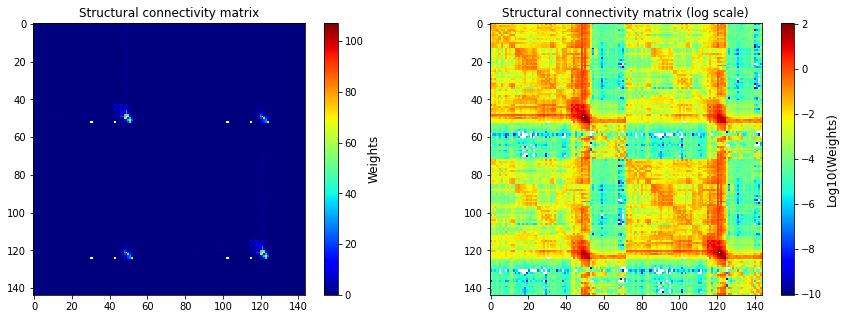

In [29]:

# Plot the resulting connectivity weights at linear and log scale
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
cs_lin = axes[0].imshow(sum_conn_new, cmap='jet', aspect='equal', interpolation='none')
axes[0].set_title('Structural connectivity matrix', fontsize=12)
axcb_lin = plt.colorbar(cs_lin, ax=axes[0])
axcb_lin.set_label('Weights', fontsize=12)

cs_log = axes[1].imshow(np.log10(sum_conn_new), cmap='jet', aspect='equal', interpolation='none')
axes[1].set_title('Structural connectivity matrix (log scale)', fontsize=12)
axcb_log = plt.colorbar(cs_log, ax=axes[1])
axcb_log.set_label('Log10(Weights)', fontsize=12)


In [30]:
import h5py

# the method returns the tract lengths between the brain areas in the selected parcellation
def construct_tract_lengths(centres):
    n_regions = len(centres)
    tracts = np.zeros((n_regions, n_regions), dtype=float)
    for i_ind, inj in enumerate(centres):
        for i_targ, targ in enumerate(centres):
            tracts[i_ind, i_targ] = np.sqrt(
                (inj[0] - targ[0]) ** 2 + (inj[1] - targ[1]) ** 2 + (inj[2] - targ[2]) ** 2)
    return tracts

def write_connectivity_to_h5_file(connectivity, filename):
    #save the structural conn matrix
    f = h5py.File(os.path.join(data_path, filename), "w")
    for attr in ["weights", "tract_lengths", "centres", "region_labels"]:
        if attr == "region_labels":
            f.create_dataset(attr, data=getattr(connectivity, attr).astype(h5py.string_dtype(encoding='utf-8')))

        else:
            f.create_dataset(attr, data=getattr(connectivity, attr))
    f.close()  
    

In [31]:
# Write the resulting connectivity to .h5 TVB compatible file...
write_connectivity_to_h5_file(new_conn, "Connectivity_SummedSubcortical.h5")
# ... along with the corresponding mapping from regions to major structures.
np.save("major_structs_labels.npy", major_structs_labels)

In [11]:

# #save this matrix
# # results: Connectivity, Volume & RegionVolumeMapping
#         # Connectivity
# result_connectivity_sum = Connectivity()
# #average over all centres in this major region
# centres = result_connectivity.centres
# centres_sum= np.zeros((47,3))
# centres_sum[0:sum(counts[0:2])]=centres[[i for i,x in enumerate(which_major) if x < 2]]  
# for k in range(0,(len(unique)-2)): #11 major other structures are out there  
#     centres_sum[sum(counts[0:2])+k]= np.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
    
# result_connectivity_sum.centres = centres_sum

# names_sum=[]# np.zeros((45))
# indices=[i for i,x in enumerate(which_major) if x < 2]
# new= np.array(result_connectivity.region_labels)

# names_sum[0:sum(counts[0:2])]=new[indices]
# nn= np.unique(found_list)
# for k in range(0,(len(unique)-2)): #11 major other structures are out there  
#     names_sum.append(nn[k+2])
    
# # #put in names of major structures
# result_connectivity_sum.region_labels =  np.array(names_sum)
# result_connectivity_sum.weights = sum_conn_new
# #calculate new tract lengths based on new centres
# tract_lengths_sum = construct_tract_lengths(centres_sum)
# result_connectivity_sum.tract_lengths = tract_lengths_sum
# result_connectivity_sum.configure()

# write_connectivity_to_h5_file(result_connectivity_sum, "Connectivity_res100_summ47regions.h5")
              
# print(result_connectivity_sum.weights)
# print(result_connectivity_sum.region_labels)
# print(result_connectivity_sum.number_of_regions)
# print(len(result_connectivity_sum.region_labels))
# print(result_connectivity_sum.weights.shape)
# print(result_connectivity_sum.tract_lengths.shape)


In [12]:
# f.close()

Now let us take out the Inferior olivary complex from the medulla in order to have it also as a spiking region:

In [13]:
# np.unique(found_list)

In [14]:
# which_major #medulla is 6

# counts #78 regions in medulla
# #if 'inferior_olivary_complex' in result_connectivity.region_labels
# matching = [s for s in result_connectivity.region_labels if "Inferior olivary complex" in s]
# matching
# #result_connectivity.region_labels.index("Inferior olivary complex")
# indiol=np.where(result_connectivity.region_labels == "Right Inferior olivary complex")
# indior= np.where(result_connectivity.region_labels == "Left Inferior olivary complex")
# which_major[indiol]

In [15]:
# sum_conn=result_connectivity.weights
# q=0
# sum_conn_new= np.zeros((49,49)) #one more cerebellar nuclei region --> 36 regions cerebellum (right and left) + 11 major structures
# which_major=np.zeros(596)
# for i in np.unique(found_list):
#     #print(i)
#     for j in range(len(found_list)): #over all regions
#         if i == found_list[j]: #then this region belongs to this major structure
#             #print(i,found_list[j])
#             which_major[j]=q #.append(q) #a list giving every region its number belonging to the major structure
#             #print(which_major)
#     q+=1

# # let us treat inferior olive as one of the cerebellar regions, therefore we will now manipulate the major region to cerebellum
# which_major[indiol]=0
# which_major[indior]=0


# unique, counts = np.unique(which_major, return_counts=True)
# sum_conn_new[0:sum(counts[0:2])][:,0:sum(counts[0:2])]=sum_conn[[i for i,x in enumerate(which_major) if x < 2]][:,[i for i,x in enumerate(which_major) if x < 2]]
# #alright the above line puts the inside-cerebellar connections in the new connectome
# #sum_conn[0:sum(counts[0:2])][:,0:sum(counts[0:2])]  
# for k in range(0,(len(unique)-2)): #11 major other structures are out there , change this to include the X's
#     for reg in range(sum(counts[0:2])):
#         sum_conn_new[sum(counts[0:2])+k,reg]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)],reg])
#         sum_conn_new[reg,sum(counts[0:2])+k]=np.sum(sum_conn[reg,[i for i,x in enumerate(which_major) if x==(k+2)]])
#     for l in range(k+1,(len(unique)-2)): #with all other major structure
#         sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
#         sum_conn_new[sum(counts[0:2])+l,sum(counts[0:2])+k]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(l+2)]][:,[i for i,x in enumerate(which_major) if x==(k+2)]])
# #now still to fill major structures among each other #11x11 matrix
# #put diagonal to zero
# for jj in range(49):
#     sum_conn_new[jj,jj]=0


In [16]:
# plt.subplots()
# #cs=plt.imshow(np.log10(conn.weights), cmap='jet', aspect='equal', interpolation='none')
# cs=plt.imshow(sum_conn_new, cmap='jet', aspect='equal', interpolation='none')
# # cs=plt.imshow(np.log10(sum_conn_new), cmap='jet', aspect='equal', interpolation='none')

# plt.title('Structural connectivity matrix', fontsize=20)
# axcb=plt.colorbar(cs)
# axcb.set_label('Log10(weights)', fontsize=20)

In [17]:

# result_connectivity_sum = Connectivity()
# #average over all centres in this major region
# centres_sum= np.zeros((49,3))
# centres_sum[0:sum(counts[0:2])]=centres[[i for i,x in enumerate(which_major) if x < 2]]  
# for k in range(0,(len(unique)-2)): #11 major other structures are out there  
#     centres_sum[sum(counts[0:2])+k]= np.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
    
# result_connectivity_sum.centres = centres_sum

# names_sum=[]# np.zeros((45))
# indices=[i for i,x in enumerate(which_major) if x < 2]
# new= np.array(result_connectivity.region_labels)

# names_sum[0:sum(counts[0:2])]=new[indices]
# nn= np.unique(found_list)
# for k in range(0,(len(unique)-2)): #11 major other structures are out there  
#     names_sum.append(nn[k+2])
    
# # #put in names of major structures
# result_connectivity_sum.region_labels =  np.array(np.array(names_sum))
# result_connectivity_sum.weights = sum_conn_new
# #calculate new tract lengths based on new centres
# tract_lengths_sum = construct_tract_lengths(centres_sum)
# result_connectivity_sum.tract_lengths = tract_lengths_sum
# result_connectivity_sum.configure()

# #save the structural conn matrix
# # write_connectivity_to_h5_file(result_connectivity_sum, "Connectivity_res100_summ49regions_IOsplit.h5")

# print(result_connectivity_sum.weights)
# print(result_connectivity_sum.region_labels)
# print(result_connectivity_sum.number_of_regions)
# print(len(result_connectivity_sum.region_labels))
# print(result_connectivity_sum.weights.shape)
# print(result_connectivity_sum.tract_lengths.shape)